# Real State Analisys

Analysis of Real State Market

### Import Dependencies

In [1]:
import os
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import pandas as pd
import time
import numpy as np
import pprint
import datetime

# Import DB user and password
from api_keys import positionstack_key
from api_keys import opencagedata_API
from api_keys import DATABASE_URL

In [2]:
 # Imports the method used to connect to DBs
from sqlalchemy import create_engine
from sqlalchemy import exc
from sqlalchemy import update

# Imports the methods needed to abstract python classes into database tables
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# function to establish a session with a connected database
from sqlalchemy.orm import Session

# database compliant datatypes
from sqlalchemy import Column, Integer, String, Float, ForeignKey, DateTime

# from config import db_user, dialect

In [3]:
# Create database connection
engine = create_engine(DATABASE_URL) 

<hr style="border: 3px solid red;">

### Basic Analysis

In [4]:
# Query database using pandas
SQL_Query_df = pd.read_sql_query('''select * from realstatelisting''', engine)

In [5]:
SQL_Query_df.describe()

,house_id,price,bed,bath,sqft,lot,latitude,longitude
count,1331.000000,1331.000000,1331.000000,1331.000000,1324.000000,1188.000000,1181.000000,1181.000000
mean,696.197596,243981.790383,3.346356,2.254696,1952.163897,7266.130471,29.807885,-95.408650
std,399.819594,54889.311717,0.696570,0.507580,588.933730,5943.899835,0.131373,0.154498
min,1.000000,150000.000000,1.000000,0.500000,480.000000,1399.000000,29.544055,-95.718095
25%,356.500000,199000.000000,3.000000,2.000000,1532.250000,5000.000000,29.716181,-95.523039
50%,703.000000,236686.000000,3.000000,2.000000,1844.000000,6825.000000,29.813105,-95.410666
75%,1038.500000,289250.000000,4.000000,2.500000,2309.250000,8400.000000,29.903282,-95.279514
max,1389.000000,350000.000000,6.000000,4.000000,5990.000000,113256.000000,30.209713,-95.096904


In [6]:
SQL_Query_df.head(2)

,house_id,address,price,bed,bath,sqft,lot,latitude,longitude,house_link,image_1,image_2,map_link,google_map,created_date
0,173,"308 Avenue of Oaks St, Houston, TX 77009",319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/b9f727d5efd77dd8bc2f0c79...,https://ap.rdcpix.com/b9f727d5efd77dd8bc2f0c79...,https://www.openstreetmap.org/?mlat=29.8113709...,https://www.google.com/maps/place/308+Avenue+o...,2021-01-10 21:13:15.025962
1,174,"7911 Napawood Ct, Houston, TX 77088",199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/434ef360d1242e7680dbcf64...,https://ap.rdcpix.com/434ef360d1242e7680dbcf64...,https://www.openstreetmap.org/?mlat=29.8806332...,https://www.google.com/maps/place/7911+Napawoo...,2021-01-10 21:13:15.139330


Text(0, 0.5, 'price')

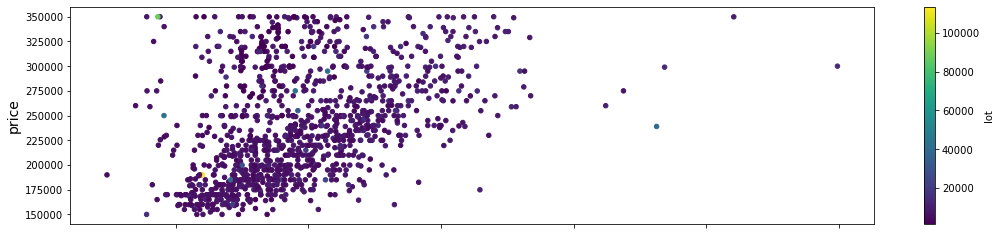

In [7]:
ax1 = SQL_Query_df.plot.scatter(x='sqft',y='price',c='lot', colormap='viridis',figsize=(18,4))
ax1.set_xlabel("sqft", fontsize=14)
ax1.set_ylabel("price", fontsize=14)

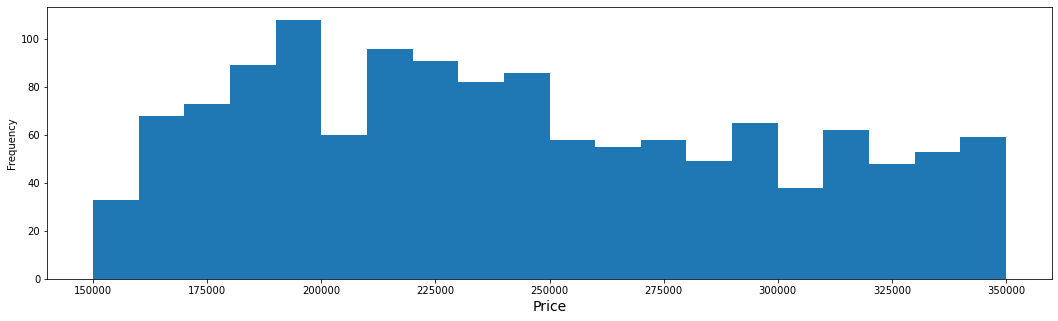

In [8]:
ax1 = SQL_Query_df['price'].plot(kind='hist',bins=20,figsize=(18,5));
ax1.set_xlabel("Price", fontsize=14);

Text(0, 0.5, 'longitude')

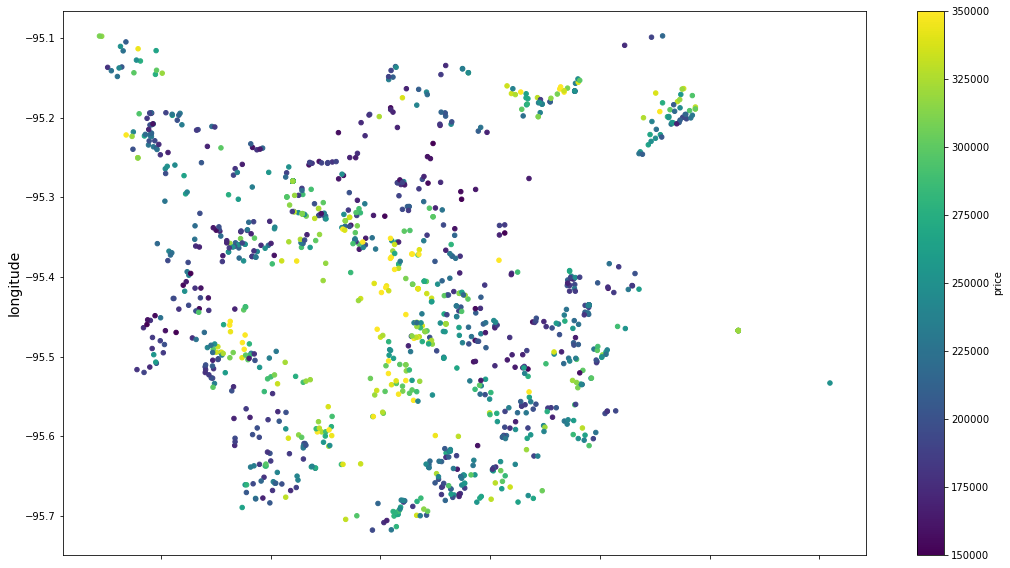

In [9]:
ax1 = SQL_Query_df.plot.scatter(x='latitude',y='longitude',c='price', colormap='viridis',figsize=(18,10))
ax1.set_xlabel("latitude", fontsize=14)
ax1.set_ylabel("longitude", fontsize=14)

In [10]:
zipcode_list = []
for jj in range(len(SQL_Query_df)):
    zipcode_list.append(int(SQL_Query_df.iloc[jj].address.split(" ")[-1]))

In [11]:
SQL_Query_df['Zip Code'] = pd.Series(zipcode_list)

In [12]:
print(f"Number of Zip Codes: {len(SQL_Query_df['Zip Code'].unique())}")

Number of Zip Codes: 94


In [13]:
SQL_Query_df.drop(columns={'house_link','image_1','image_2','map_link','google_map'})

,house_id,address,price,bed,bath,sqft,lot,latitude,longitude,created_date,Zip Code
0,173,"308 Avenue of Oaks St, Houston, TX 77009",319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,2021-01-10 21:13:15.025962,77009
1,174,"7911 Napawood Ct, Houston, TX 77088",199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,2021-01-10 21:13:15.139330,77088
2,175,"3110 Willow Wood Trl, Houston, TX 77345",295000.0,4.0,2.5,2616.0,10890.0,30.084300,-95.171903,2021-01-10 21:13:15.252517,77345
3,176,"16118 Windom Dr, Houston, TX 77598",179000.0,2.0,2.0,1104.0,7150.0,29.551512,-95.136427,2021-01-10 21:13:15.365052,77598
4,177,"3405 Rawley St, Houston, TX 77020",309900.0,3.0,3.5,2508.0,3506.0,29.778996,-95.335636,2021-01-10 21:13:15.478296,77020
...,...,...,...,...,...,...,...,...,...,...,...
1326,1385,"7413 Albacore Dr, Houston, TX 77074",299500.0,3.0,3.0,1488.0,7257.0,NaN,NaN,2021-01-13 16:13:03.380212,77074
1327,1386,"4311 Long Glen Dr, Houston, TX 77339",249000.0,4.0,2.0,2372.0,10454.0,NaN,NaN,2021-01-13 16:13:03.502146,77339
1328,1387,"12421 Wellington Park Dr, Houston, TX 77072",174900.0,3.0,2.5,1715.0,3854.0,NaN,NaN,2021-01-13 16:13:03.620302,77072
1329,1388,"5302 Lodge Creek Dr, Houston, TX 77066",259000.0,5.0,3.5,3566.0,9517.0,NaN,NaN,2021-01-13 16:13:03.739019,77066


Text(0, 0.5, 'Price ($)')

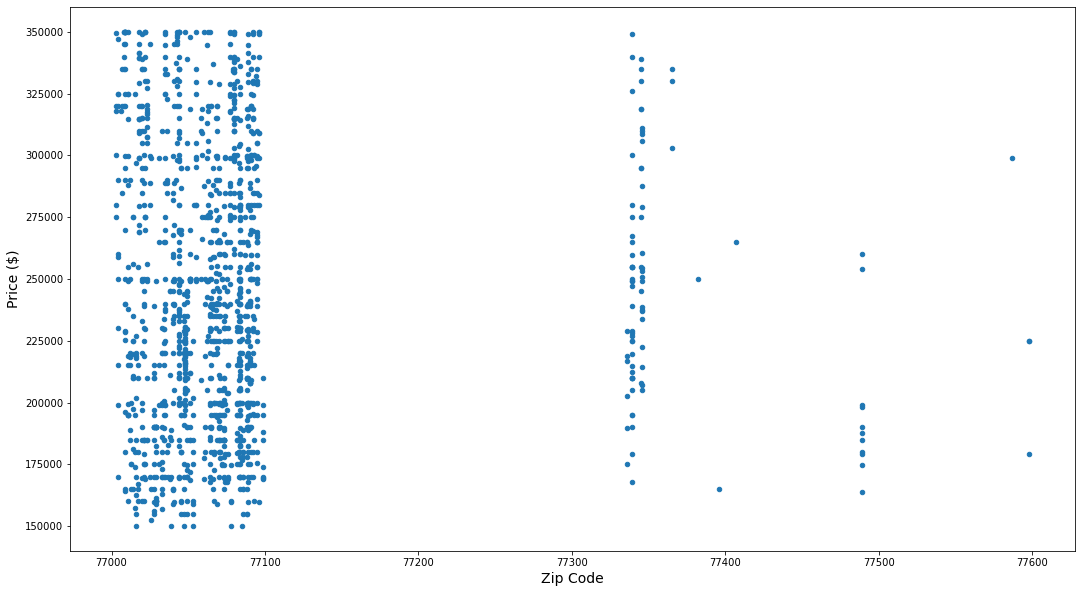

In [14]:
ax1 = SQL_Query_df.plot.scatter(x='Zip Code',y='price',figsize=(18,10))
ax1.set_xlabel("Zip Code", fontsize=14)
ax1.set_ylabel("Price ($)", fontsize=14)

Text(0, 0.5, 'longitude')

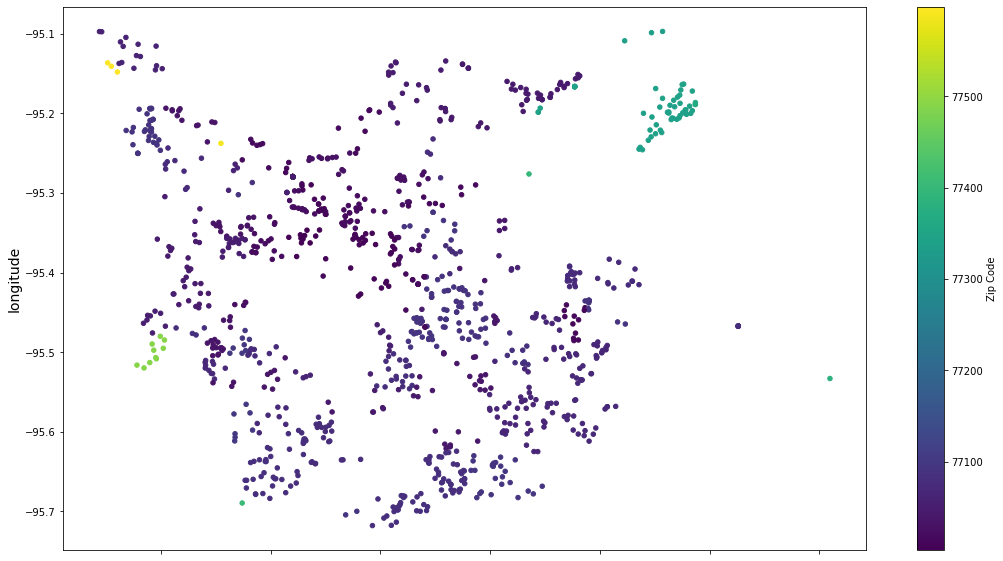

In [15]:
ax1 = SQL_Query_df.plot.scatter(x='latitude',y='longitude',c='Zip Code', colormap='viridis',figsize=(18,10))
ax1.set_xlabel("latitude", fontsize=14)
ax1.set_ylabel("longitude", fontsize=14)

Text(0, 0.5, 'Price ($)')

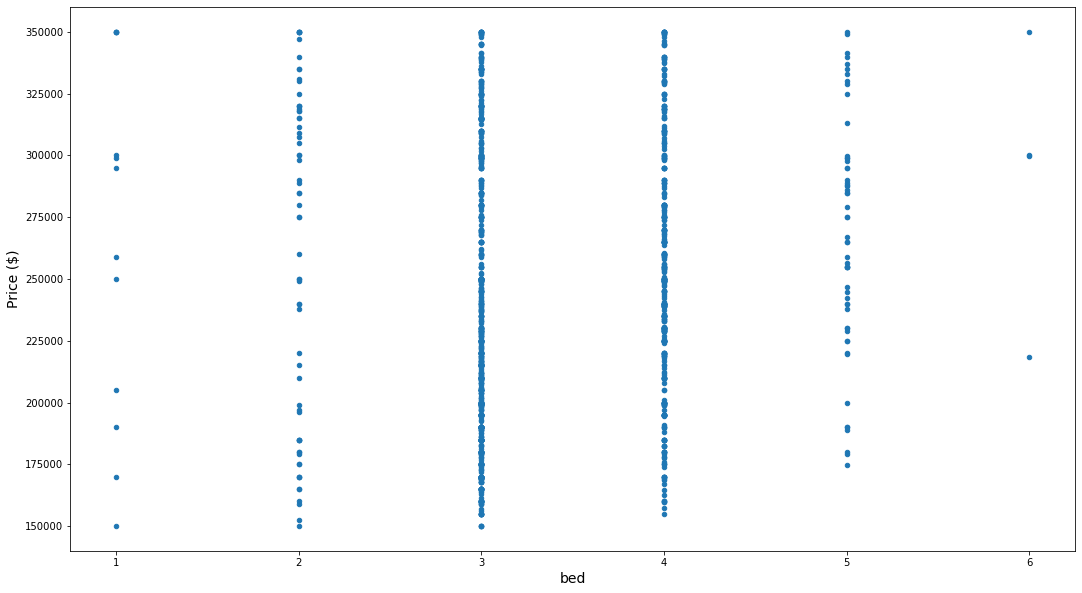

In [16]:
ax1 = SQL_Query_df.plot.scatter(x='bed',y='price',figsize=(18,10))
ax1.set_xlabel("bed", fontsize=14)
ax1.set_ylabel("Price ($)", fontsize=14)

Text(0, 0.5, 'sqft')

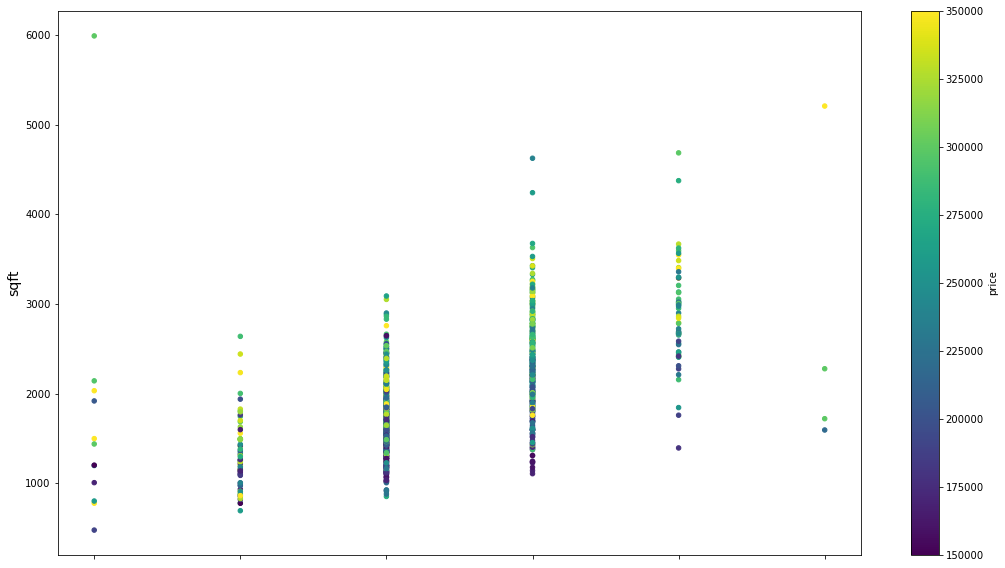

In [17]:
ax1 = SQL_Query_df.plot.scatter(x='bed',y='sqft',c='price', colormap='viridis',figsize=(18,10))
ax1.set_xlabel("Zip Code", fontsize=14)
ax1.set_ylabel("sqft", fontsize=14)

Zip Codes

In [ ]:
zipcode_file = 